<a href="https://colab.research.google.com/github/KAILASHVenkat/LR-Parser/blob/main/LR_Parser11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a program that implements a LR(0) Parser in Python.

<u>_**LR(0) PARSER**_</u>


LR(0) parsing is a technique used in computer science and compiler construction to parse context-free grammars, particularly for generating deterministic parsers for languages. The LR(0) parser is part of a family of shift-reduce parsers known as LR parsers, which stands for "left-to-right, rightmost derivation." Here's a brief overview of LR(0) parsing:

**1)<u> Parsing Technique:</u>** LR(0) parsing is a bottom-up parsing technique, meaning it starts from the input tokens and works its way up to the start symbol of the grammar. It builds the parse tree in a bottom-up manner by repeatedly applying shift and reduce operations.

**2)<u>State-Based Parsing:</u>** LR(0) parsing utilizes a finite automaton known as the LR(0) automaton to track the parser's state as it processes the input tokens. Each state represents a set of items, where an item is a production rule with a "dot" indicating the position of the parser within that rule.

**3)<u>Items and Transitions:</u>** In LR(0) parsing, each item represents a possible configuration of the parser. Transitions between states occur based on the next input token and the current state of the parser. These transitions are determined by the LR(0) automaton, which is constructed based on the grammar's productions.

**4)<u>Conflict Resolution:**</u> LR(0) parsers are powerful because they can handle a broad class of grammars, including ambiguous grammars. However, LR(0) parsers may encounter conflicts, such as shift-reduce conflicts or reduce-reduce conflicts, which require resolution strategies to determine the correct parsing action.

**5)<u>Table-Driven Parsing:**</u> To implement an LR(0) parser, a parsing table known as the LR(0) parsing table is constructed. This table contains entries that dictate the parser's actions (shift, reduce, or accept) based on the current state and the next input token. The table-driven approach makes LR(0) parsing efficient and suitable for automated parser generation.

**6)<u>Limitations:**</u> Despite its power, LR(0) parsing has limitations. It cannot handle left-recursive grammars and requires a grammar to be LR(0) or LR(1) to ensure unambiguous parsing. Additionally, LR(0) parsing can suffer from states explosion for larger grammars, leading to larger parsing tables and increased parsing time.

_**The key point to note is that the LR(0) Parser does not work for left recursive grammars i.e. grammars that have productions of the form A->bB |
 C.**_

The output of the code is the augmented grammar of the input grammar, the parsing table and the process table of the input string entered by the user. The code then prints if the string is parsable or not. If the string is parsable, then the parse tree is printed by the program.

In [32]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
import requests
from google.colab import files
import os
from collections import Counter
import pyfiglet
import termtables as tt

In [2]:
!pip install pyfiglet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.5 MB/s eta 0:00:00


In [3]:
!pip install termtables

In [48]:
result = pyfiglet.figlet_format("LR ( 0 ) Parser",font='graceful')
print(result)

def append_dot(a):
    jj = a.replace("->", "->.")
    return jj


def closure(a):
    temp = [a]
    for it in temp:
        jj = it[it.index(".") + 1]
        if jj != len(it) - 1:
            for k in prod:
                if k[0][0] == jj and (append_dot(k)) not in temp:
                    temp.append(append_dot(k))
        else:
            for k in prod:
                if k[0][0] == jj and it not in temp:
                    temp.append(it)

    return temp


def swap(new, pos):
    new = list(new)
    temp = new[pos]
    if pos != len(new):
        new[pos] = new[pos + 1]
        new[pos + 1] = temp
        new1 = "".join(new)
        return new1
    else:
        return "".join(new)


def goto1(x1):
    hh = []
    pos = x1.index(".")
    if pos != len(x1) - 1:
        jj = list(x1)
        kk = swap(jj, pos)
        if kk.index(".") != len(kk) - 1:
            jjj = closure(kk)
            return jjj
        else:
            hh.append(kk)
            return hh
    else:
        return x1


def get_terminals(gram):
    terms = set()
    for p in gram:
        x1 = p.split('->')
        for t in x1[1].strip():
            if not t.isupper() and t != '.' and t != '':
                terms.add(t)

    terms.add('$')

    return terms


def get_non_terminals(gram):
    terms = set()
    for p in gram:
        x1 = p.split('->')
        for t in x1[1].strip():
            if t.isupper():
                terms.add(t)

    return terms


def get_list(graph, state):
    final = []
    for g in graph:
        if int(g.split()[0]) == state:
            final.append(g)

    return final


if __name__ == '__main__':
    #This is where we define our grammar(Augmented grammar)
    prod = ['X->.S', 'S->AA','A->aA','A->b']
    set_of_items = []
    c = []


    print("---------------------------------------------------------------")
    print("Augmented Grammar")
    print(prod)

    prod_num = {}
    for i in range(1, len(prod)):
        prod_num[str(prod[i])] = i

    j = closure("X->.S")
    set_of_items.append(j)

    state_numbers = {}
    dfa_prod = {}
    items = 0
    while True:
        if len(set_of_items) == 0:
            break

        jk = set_of_items.pop(0)
        kl = jk
        c.append(jk)
        state_numbers[str(jk)] = items
        items += 1

        if len(jk) > 1:
            for item in jk:
                jl = goto1(item)
                if jl not in set_of_items and jl != kl:
                    set_of_items.append(jl)
                    dfa_prod[str(state_numbers[str(jk)]) + " " + str(item)] = jl
                else:
                    dfa_prod[str(state_numbers[str(jk)]) + " " + str(item)] = jl

    for item in c:
        for j in range(len(item)):
            if goto1(item[j]) not in c:
                if item[j].index(".") != len(item[j]) - 1:
                    c.append(goto1(item[j]))

    print("---------------------------------------------------------------")
    print("Total States: ", len(c))
    for i in range(len(c)):
        print(i, ":", c[i])
    print("---------------------------------------------------------------")

    dfa = {}
    for i in range(len(c)):
        if i in dfa:
            pass
        else:
            lst = get_list(dfa_prod, i)
            samp = {}
            for j in lst:
                s = j.split()[1].split('->')[1]
                search = s[s.index('.') + 1]
                samp[search] = state_numbers[str(dfa_prod[j])]

            if samp != {}:
                dfa[i] = samp

    table = []

    term = sorted(list(get_terminals(prod)))
    header = [''] * (len(term) + 1)
    header[(len(term) + 1) // 2] = 'Action'

    non_term = sorted(list(get_non_terminals(prod)))

    header2 = [''] * len(non_term)
    header2[(len(non_term)) // 2] = 'Goto'

    table.append([''] + term + non_term)

    table_dic = {}

    for i in range(len(c)):
        data = [''] * (len(term) + len(non_term))
        samp = {}

        # Action
        try:
            for j in dfa[i]:
                if not j.isupper() and j != '' and j != '.':
                    ind = term.index(j)
                    data[ind] = 'S' + str(dfa[i][j])
                    samp[term[ind]] = 'S' + str(dfa[i][j])

        except Exception:
            if i != 1:
                s = list(c[i][0])
                s.remove('.')
                s = "".join(s)
                lst = [i] + ['r' + str(prod_num[s])] * len(term)
                lst += [''] * len(non_term)
                table.append(lst)
                for j in term:
                    samp[j] = 'r' + str(prod_num[s])
            else:
                lst = [i] + [''] * (len(term) + len(non_term))
                lst[-1] = 'Accept'
                table.append(lst)

        # Goto
        try:
            for j in dfa[i]:
                if j.isupper():
                    ind = non_term.index(j)
                    data[len(term) + ind] = dfa[i][j]

                    samp[j] = str(dfa[i][j])

            table.append([i] + data)
        except Exception:
            pass

        if samp == {}:
            table_dic[i] = {'$': 'Accept'}
        else:
            table_dic[i] = samp

    row_index=2
    column1_index=1
    column6_index=len(term)+len(non_term)
    table[row_index][column1_index], table[row_index][column6_index] =  table[row_index][column6_index], table[row_index][column1_index]
    #print(table)
    final_table = tt.to_string(data=table, header=header + header2, style=tt.styles.ascii_thin_double, padding=(0, 1))
    #print(len(term))
    #print("\n")
    #print(len(non_term))
    #print("\n")
    print(final_table)
    print("\n")

    # Parse String
    string = input("Enter the string to be parsed: ")
    string += '$'
    print("\n")

    stack = [0]
    pointer = 0

    # print(table_dic)

    header = ['Process', 'Look Ahead', 'Symbol', 'Stack']
    data = []

    i = 0
    accepted = False
    while True:
        try:
            try:
                prods = dfa[stack[-1]]
                prod_i = prods[string[i]]  # state num
            except Exception:
                prod_i = None

            try:
                tab = table_dic[stack[-1]]
                tab_i = tab[string[i]]  # S or r
            except Exception:
                tab = table_dic[stack[-2]]
                tab_i = tab[stack[-1]]  # S or r

            if tab_i == 'Accept':
                data.append(['Action({0}, {1}) = {2}'.format(stack[-1], string[i], tab_i), i, string[i], str(stack)])
                accepted = True
                break
            else:
                if tab_i[0] == 'S' and not str(stack[-1]).isupper():
                    lst = ['Action({0}, {1}) = {2}'.format(stack[-1], string[i], tab_i), i, string[i]]
                    stack.append(string[i])
                    stack.append(prod_i)
                    lst.append(str(stack))
                    data.append(lst)
                    i += 1
                elif tab_i[0] == 'r':
                    lst = ['Action({0}, {1}) = {2}'.format(stack[-1], string[i], tab_i), i, string[i]]
                    x = None
                    for i1 in prod_num:
                        if prod_num[i1] == int(tab_i[1]):
                            x = i1
                            break

                    length = 2 * (len(x.split('->')[1]))
                    for _ in range(length):
                        stack.pop()

                    stack.append(x[0])
                    lst.append(str(stack))
                    data.append(lst)
                else:
                    lst = ['goto({0}, {1}) = {2}'.format(stack[-2], stack[-1], tab_i), i, string[i]]
                    stack.append(int(tab_i))
                    lst.append(str(stack))
                    data.append(lst)
        except Exception:
            accepted = False
            break

    try:
        parsing_table = tt.to_string(data=data, header=header, style=tt.styles.ascii_thin_double, padding=(0, 1))
        print(parsing_table)
        if accepted:
            string = string[:-1]
            print(f"\n\n")
            print("The string {0} is parsable!".format(string))
            print(f"\n\n")
            #Add here
        else:
            print("The string {0} is not parsable!".format(string))
            print(f"\n\n")
    except Exception:
        print("Invalid string entered!")

 __    ____     _     __     _     ____   __   ____  ____  ____  ____ 
(  )  (  _ \   / )   /  \   ( \   (  _ \ / _\ (  _ \/ ___)(  __)(  _ \
/ (_/\ )   /  ( (   (  0 )   ) )   ) __//    \ )   /\___ \ ) _)  )   /
\____/(__\_)   \_)   \__/   (_/   (__)  \_/\_/(__\_)(____/(____)(__\_)

---------------------------------------------------------------
Augmented Grammar
['X->.S', 'S->AA', 'A->aA', 'A->b']
---------------------------------------------------------------
Total States:  7
0 : ['X->.S', 'S->.AA', 'A->.aA', 'A->.b']
1 : ['X->S.']
2 : ['S->A.A', 'A->.aA', 'A->.b']
3 : ['A->a.A', 'A->.aA', 'A->.b']
4 : ['A->b.']
5 : ['S->AA.']
6 : ['A->aA.']
---------------------------------------------------------------
+---+--------+--------+----+---+------+
|   |        | Action |    |   | Goto |
+===+========+========+====+===+======+
|   | $      | a      | b  | A | S    |
+---+--------+--------+----+---+------+
| 0 |        | S3     | S4 | 2 | 1    |
+---+--------+--------+----+---+------+
| 1

In [76]:
print(len(data))
i=0
for x in range(0,len(data)):
  if(data[x][0][-2:-1]=='r'):
    i=i+1
    print(data[x][0][-2:])

my_array = [0 for _ in range(i)]
i=0
for x in range(0,len(data)):
  if(data[x][0][-2:-1]=='r'):
    my_array[i]=int(data[x][0][-1:])
    i=i+1
myarray=my_array[::-1]
myarray

15
r3
r2
r2
r3
r1


[1, 3, 2, 2, 3]

In [77]:
arr=prod[1:]
i

5

In [78]:
j=0
modified_array = [s.replace('->', '') for s in arr]
print("Modified array:", modified_array)
arr=modified_array
for r in myarray:
  rule=arr[r-1]
  print(rule)
  j=j+len(rule)
k=0
valarray = ['' for _ in range(j)]
lenarray = [0 for _ in range(i)]
print(lenarray)
u=0
for r in myarray:
  rule=arr[r-1]
  lenarray[u]=len(rule)
  u+=1
  for x in rule:
    valarray[k]=x
    k=k+1

print(valarray)
print(lenarray)

Modified array: ['SAA', 'AaA', 'Ab']
SAA
Ab
AaA
AaA
Ab
[0, 0, 0, 0, 0]
['S', 'A', 'A', 'A', 'b', 'A', 'a', 'A', 'A', 'a', 'A', 'A', 'b']
[3, 2, 3, 3, 2]


In [79]:
# Your array of characters
input_array = valarray

# Initialize arrays
arr_non_term = []
arr_term = []

# Iterate over each character in the array
for char in input_array:
    # Check if the character is a capital letter
    if char.isupper():
        # Check if the character is not already in arr_non_term
        if char not in arr_non_term:
            arr_non_term.append(char)
    # If the character is not a capital letter
    else:
        # Check if the character is not already in arr_term
        if char not in arr_term:
            arr_term.append(char)

# Print the arrays
print("Non-terminal array:", arr_non_term)
print("Terminal array:", arr_term)
arr_nontermcount = [0 for _ in range(len(arr_non_term))]
arr_termcount = [0 for _ in range(len(arr_term))]
print(arr_nontermcount)
print(arr_termcount)
print(valarray)
print(lenarray)

Non-terminal array: ['S', 'A']
Terminal array: ['b', 'a']
[0, 0]
[0, 0]
['S', 'A', 'A', 'A', 'b', 'A', 'a', 'A', 'A', 'a', 'A', 'A', 'b']
[3, 2, 3, 3, 2]


In [75]:
track = 0
treedict = {}
for t in range(len(lenarray)):
    values = []
    key = ''
    for b in range(lenarray[t]):
        if b == 0:
            val = valarray[track]
            index = arr_non_term.index(val)
            integervalue = arr_nontermcount[index]
            key = valarray[track]+str(integervalue)
            arr_nontermcount[index]+=1
        else:
            val = valarray[track]
            if val in arr_non_term:
                index = arr_non_term.index(val)
                integervalue = arr_nontermcount[index]
                values.append(valarray[track] + str(integervalue))
                arr_nontermcount[index] += 1
            if val in arr_term:
                index = arr_term.index(val)
                integervalue = arr_termcount[index]
                values.append(valarray[track] + str(integervalue))
                arr_termcount[index] += 1
        track += 1
    #arr_nontermcount = [x - y for x, y in zip(arr_nontermcount, visi)]
    visi = [0 for _ in range(len(arr_non_term))]

    print(key)
    print(values)
    treedict[key] = values

print(treedict)


S0
['A0', 'A1']
A1
['b0']
A2
['a0', 'A3']
A3
['a1', 'A4']
A4
['b1']
{'S0': ['A0', 'A1'], 'A1': ['b0'], 'A2': ['a0', 'A3'], 'A3': ['a1', 'A4'], 'A4': ['b1']}


In [80]:
track = 0
treedict = {}
arr_nontermcount = [0 for _ in range(len(arr_non_term))]  # Initialize count for non-terminal symbols
arr_termcount = [0 for _ in range(len(arr_term))]  # Initialize count for terminal symbols

for t in range(len(lenarray)):
    values = []
    key = ''
    for b in range(lenarray[t]):
        val = valarray[track]
        if b == 0:
            index = arr_non_term.index(val)
            integervalue = arr_nontermcount[index]
            key = valarray[track] + str(integervalue)
            arr_nontermcount[index] += 1
        else:
            if val in arr_non_term:
                index = arr_non_term.index(val)
                integervalue = arr_nontermcount[index]
                values.append(valarray[track] + str(integervalue))
                arr_nontermcount[index] += 1
            elif val in arr_term:
                index = arr_term.index(val)
                integervalue = arr_termcount[index]
                values.append(valarray[track] + str(integervalue))
                arr_termcount[index] += 1
        track += 1
    print(key)
    print(values)
    treedict[key] = values

print(treedict)


S0
['A0', 'A1']
A2
['b0']
A3
['a0', 'A4']
A5
['a1', 'A6']
A7
['b1']
{'S0': ['A0', 'A1'], 'A2': ['b0'], 'A3': ['a0', 'A4'], 'A5': ['a1', 'A6'], 'A7': ['b1']}


 ____   __   ____  ____  ____    ____  ____  ____  ____ 
(  _ \ / _\ (  _ \/ ___)(  __)  (_  _)(  _ \(  __)(  __)
 ) __//    \ )   /\___ \ ) _)     )(   )   / ) _)  ) _) 
(__)  \_/\_/(__\_)(____/(____)   (__) (__\_)(____)(____)



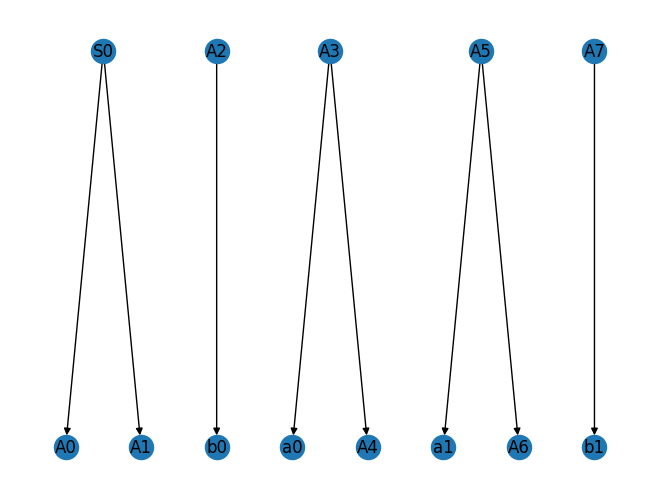

In [81]:
result1 = pyfiglet.figlet_format("Parse Tree",font='graceful')
print(result1)

import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

# Define the tree structure
tree = treedict
# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for parent, children in tree.items():
    G.add_node(parent)
    for child in children:
        G.add_edge(parent, child)

# Visualize the tree
pos = graphviz_layout(G, prog="dot")
nx.draw(G, pos, with_labels=True, arrows=True)
plt.show()
